# Animating Statistical Distributions

Statistical distibutions in this notebook refer to the probability density function(PDF) of classical distributions.<br>

I will be using Python, the Matplotlib library, and Numpy to demonstrate sampling and animating of these distributions.


### Normal Distribution PDF
p(x)= $\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

where $\mu$ is the mean and $\sigma$ the standard deviation. The square of the standard deviation, $\sigma^2$, is called the variance.

The function has its peak at the mean, and its “spread” increases with the standard deviation (the function reaches 0.607 times its maximum at x + $\sigma$ and x - $\sigma$). This implies that normal is more likely to return samples lying close to the mean, rather than those far away.

### Gamma Distribution PDF
p(x)= $x^{k-1}\frac{e^{\frac{-x}{\theta}}}{\theta^k\Gamma(k)}$ <br>
where k is the shape and $\theta$ the scale, and $\Gamma$ is the Gamma function.

The Gamma distribution is often used to model the times to failure of electronic components, and arises naturally in processes for which the waiting times between Poisson distributed events are relevant.

### Exponential Distribution PDF
The PDF is a different in which it is convenient to use a unit step function to write the PDF of an <i>Exponential($\lambda$)</i><br>

$u(x)=$ $\{1$ if $x\ge 0$ <br>
and $\{ 0$ if otherwise<br>
so we can use the PDF of<br>
$f_X(x) = \lambda e^{-\lambda x}u(x)$

The exponential distribution is a continuous analogue of the geometric distribution. It describes many common situations, such as the size of raindrops measured over many rainstorms [1], or the time between page requests to Wikipedia [2].

### Uniform Distribution

A continuous random variable X is said to be have a Uniform distribution over the interval [a,b], shown as X~ Uniform(a,b), if its PDF is given by<br>

$f_X(x)=$ $\{\frac{1}{b-a}$ if $a \lt x \lt b$<br>
and $\{ 0$ if $x \lt a$ or $x \gt b$

## Plotting Distribution Together
So you seen the PDF of various contineous distributions. How do you visualize them? <br>
Lets start with our starter code. This code was sourced from Coursera as part of their visulization practice assignment.

<IPython.core.display.Javascript object>


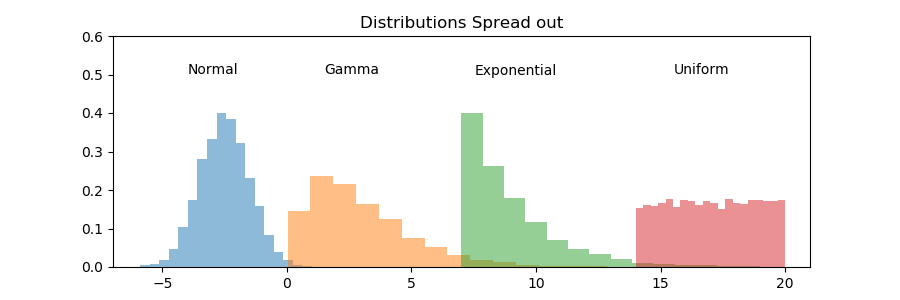

Text(0.5, 1.0, 'Distributions Spread out')

In [23]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook
# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, density=True, bins=20, alpha=0.5)
plt.hist(x2, density=True, bins=20, alpha=0.5)
plt.hist(x3, density=True, bins=20, alpha=0.5)
plt.hist(x4, density=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, '\nNormal')
plt.text(x2.mean()-1.5, 0.5, '\nGamma')
plt.text(x3.mean()-1.5, 0.5, '\nExponential')
plt.text(x4.mean()-1.5, 0.5, '\nUniform')
plt.title('Distributions Spread out')

<IPython.core.display.Javascript object>


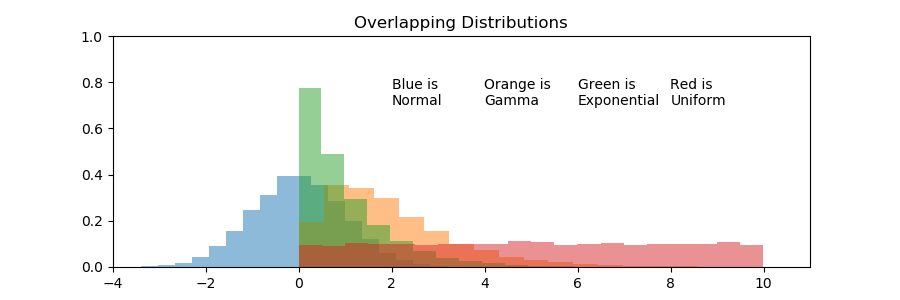

Text(0.5, 1.0, 'Overlapping Distributions')

In [24]:
%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(0, 1, 10000) # (mean 0, std. 1, 10,000 samples)
x2 = np.random.gamma(2, 1, 10000) #gamma(shape, scale=1.0, 10,000 samples)
x3 = np.random.exponential(1, 10000) # numpy.random.exponential(scale of 1, 10,000 samples)
x4 = np.random.uniform(0,10, 10000) # (starting point, ending point, 10,000 samples)

# plot the histograms
plt.figure(figsize=(9,3)) # calling a figure object
plt.hist(x1, density=True, bins=20, alpha=0.5) # placing normal distribution histogram into the figure
plt.hist(x2, density=True, bins=20, alpha=0.5)
plt.hist(x3, density=True, bins=20, alpha=0.5)
plt.hist(x4, density=True, bins=20, alpha=0.5)
plt.axis([-4,11,0,1])

plt.text(2, 0.7, 'Blue is\nNormal') # (x axis, y axis, text)
plt.text(4, 0.7, 'Orange is \nGamma')
plt.text(6, 0.7, 'Green is \nExponential')
plt.text(8, 0.7, 'Red is \nUniform')
plt.title('Overlapping Distributions')

### Plotting Distributions Separately 

To separate the plots into individual pieces I'll use two methods; state-based, and object orienteted. <br>
<br>
The first method is using state-based programming which means that each addition to plot is changing the 'state' of the object immediately. Think about a calculator. You start at a state of 0. If you add 3, then the state changes from 0 to 3. If you multiply by 5, the new state of the calculator will be 15. <br> <br>
To use state-based programming in matplotlib we use the <strong>subplot()</strong> method. 

<IPython.core.display.Javascript object>


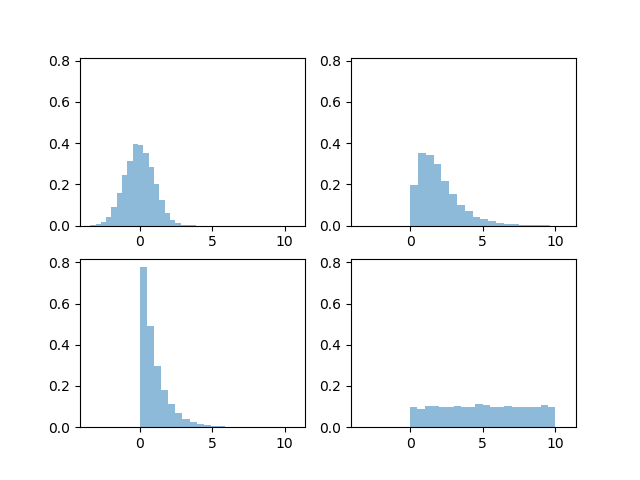

(array([0.00245894, 0.00765005, 0.01830547, 0.04234849, 0.08934164,
        0.15655279, 0.24507478, 0.31337879, 0.39452396, 0.39288466,
        0.3543612 , 0.28551076, 0.19972092, 0.12185435, 0.06229326,
        0.02868768, 0.01092864, 0.00327859, 0.0016393 , 0.00136608]),
 array([-3.39360506, -3.02759433, -2.6615836 , -2.29557288, -1.92956215,
        -1.56355142, -1.1975407 , -0.83152997, -0.46551924, -0.09950852,
         0.26650221,  0.63251294,  0.99852366,  1.36453439,  1.73054512,
         2.09655584,  2.46256657,  2.8285773 ,  3.19458802,  3.56059875,
         3.92660948]),
 <a list of 20 Patch objects>)

In [28]:
plt.figure() # Calling a figure to place plots into it

# storing the subplot into variables ax1/2/3/4
ax1 = plt.subplot(2, 2, 1) # ax will be a subplot of (2 rows, 2 columns, put the plot in index 1)

### Normal Distribution
# Using the plt.figure called earlier
plt.hist(x1, density=True, bins=20, alpha=0.5) # create a histogram (using our random samples of x1)


There is a 2 by 2 figure above. Using state-based programming methods, the initial state was an empty figure. Then we used <strong>subplots()</strong> to make a 2 by 2 figure. Afterwards use used the hist() method to plot a histogram in the initial section. <br> <br>
Now the current state of the figure() is a 2 by 2 subplot, and 1 hist() as been added to that figure in location 1. To continue changing the state of the figure, we repeat! Running the code below the figure above will update. 

In [29]:
### Gamma distribution
# repeat but...
ax2 = plt.subplot(2, 2, 2, sharex=ax1,sharey=ax1) # sharex and sharey implies they use the same x and y axis
plt.hist(x2, density=True, bins=20, alpha=0.5)

### Exponential Distribution 
ax3 = plt.subplot(2, 2, 3,sharex=ax1,sharey=ax1)
plt.hist(x3, density=True, bins=20, alpha=0.5)

### Uniform Distribution 
ax4 = plt.subplot(2, 2, 4, sharex=ax1,sharey=ax1)
plt.hist(x4, density=True, bins=20, alpha=0.5)

(array([0.09620935, 0.08980873, 0.1018099 , 0.10140986, 0.10000972,
        0.09640937, 0.10140986, 0.10020974, 0.09880961, 0.11361105,
        0.10841054, 0.09660939, 0.09820955, 0.10220994, 0.0956093 ,
        0.09860959, 0.09820955, 0.09900963, 0.1080105 , 0.0956093 ]),
 array([1.98003191e-04, 5.00149394e-01, 1.00010078e+00, 1.50005217e+00,
        2.00000356e+00, 2.49995495e+00, 2.99990635e+00, 3.49985774e+00,
        3.99980913e+00, 4.49976052e+00, 4.99971191e+00, 5.49966330e+00,
        5.99961469e+00, 6.49956608e+00, 6.99951747e+00, 7.49946886e+00,
        7.99942025e+00, 8.49937164e+00, 8.99932303e+00, 9.49927442e+00,
        9.99922581e+00]),
 <a list of 20 Patch objects>)

The <strong>Object Oriented</strong> method is slightly different. <br>
To start, the method used is <strong>subplots()</strong> - note the additional <strong>s</strong> <br><br>
Furthermore the syntax is different. In words the code reads and does:<br>
Create a <i>fig</i> object, within the <i>fig</i> create subplots that take up an array of axes objects (2 rows and 2 columns) and make sure they all have the same x & y axis.

<IPython.core.display.Javascript object>


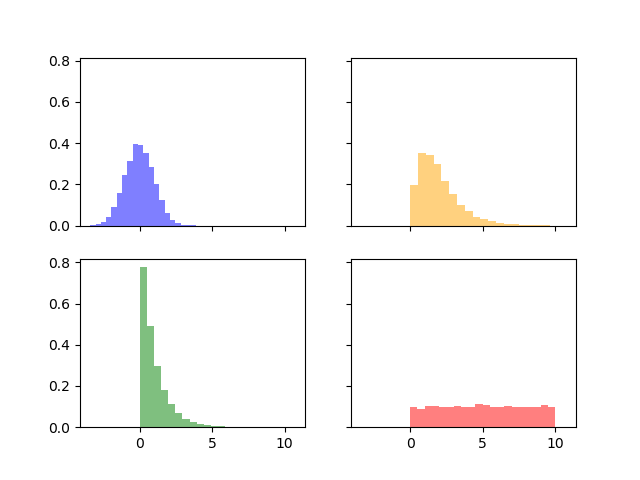

In [32]:
fig, ax = plt.subplots(2,2, sharex=True,sharey=True)
# fig.set_facecolor('lightgrey')

Unlike the state-based method, the object oriented version starts with creating a fig object that gets its
data(in matplotlib this is the axes) from an ax array. So this means that instead of adding plots 
to the figure one by one, we create the entire object first then add plots from the ax array.<br> <br>
Above, the entire figure object is created. Lets add to it now!

In [34]:
ax[0,0].hist(x1, density=True, bins=20, alpha=0.5,color='blue') # array start at 0, so at index [0,0] add the first histogram
#ax[0, 0].set_title('Normal Distribution')
ax[0,1].hist(x2, density=True, bins=20, alpha=0.5,color='orange')
#ax[0, 1].set_title('Gamma Distribution')
ax[1,0].hist(x3, density=True, bins=20, alpha=0.5,color='green')
#ax[1, 0].set_title('Exponential Distribution')
ax[1,1].hist(x4, density=True, bins=20, alpha=0.5,color='red')
#ax[1, 1].set_title('Uniform Distribution')


(array([0.09620935, 0.08980873, 0.1018099 , 0.10140986, 0.10000972,
        0.09640937, 0.10140986, 0.10020974, 0.09880961, 0.11361105,
        0.10841054, 0.09660939, 0.09820955, 0.10220994, 0.0956093 ,
        0.09860959, 0.09820955, 0.09900963, 0.1080105 , 0.0956093 ]),
 array([1.98003191e-04, 5.00149394e-01, 1.00010078e+00, 1.50005217e+00,
        2.00000356e+00, 2.49995495e+00, 2.99990635e+00, 3.49985774e+00,
        3.99980913e+00, 4.49976052e+00, 4.99971191e+00, 5.49966330e+00,
        5.99961469e+00, 6.49956608e+00, 6.99951747e+00, 7.49946886e+00,
        7.99942025e+00, 8.49937164e+00, 8.99932303e+00, 9.49927442e+00,
        9.99922581e+00]),
 <a list of 20 Patch objects>)

To impove the code, we could write a for loop, but lets save that for later!

## Using Animations To Plot Distribution

So we've learned about different statistical distributions, exposed ourselves to their PDFs, we visualized them in separate plots, and we've visualized them in the same plot. Now, lets create an animation that demostrates how sampling from these distribtions looks like. 

To create animations we the <strong>animation</strong> class within matplotlib. Within the class there is the <strong>FuncAnimation</strong> function which makes an animation by repeatedly calling a function which in this case will be <i>update</i> to draw a new 'frame'. <br><br>

Before using creating the function, some set up is required. Firstly we have to decide how many samples will be chosen. In this first example, we'll sample 100 times from each distribution. Each sample comes from a random variable(imagine a dataset with random values that fit our selected distribution), so we create these random variables with each one having 10,000 values. 

In [42]:
import matplotlib.animation as animation

n = 100

x1 = np.random.normal(0, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000) 
x3 = np.random.exponential(1, 10000)
x4 = np.random.uniform(0,10, 10000)

With the preliminaries in place, we now create the <i>update</i> function. 

In [45]:
def update(curr): # update function takes in 1 arugment curr
    if curr == n: # the first check is to make sure we're not on the last sample
        a.event_source.stop() # if we are on the last sample, we stop 'a' which is the varible we'll use for our animation
    
    plt.cla() # if its not the last sample, we clear the current axes
    bins = np.arange(-5, 10, 1) # To make the bars in the histogram the same we set a varible to store the bin values  
    plt.axis([-5,10,0,1.1]) # making sure the axis dont change with every refresh so we hardcode the size
        
    # Using the object oriented method 
    # assuming that the figure object has been made already that is 2 by 2...
    
    ax[0,0].hist(x1[:curr], bins=bins, density=True, alpha=0.2,color='blue') # in x1[0 through current index]
    ax[0,1].hist(x2[:curr], bins=bins, density=True, alpha=0.2,color='orange')
    ax[1,0].hist(x3[:curr], bins=bins, density=True, alpha=0.2,color='green')
    ax[1,1].hist(x4[:curr], bins=bins, density=True, alpha=0.2,color='red')
    
    # the annotate method lets us put text in figure
    plt.annotate('n = {}'.format(curr),[0,.6]) # (the text we want .format(the current index), in location[x,y]) 

<IPython.core.display.Javascript object>


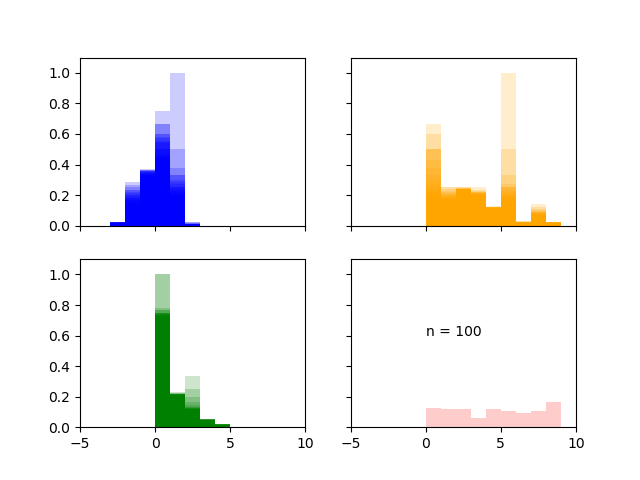

In [46]:
## Using the object oriented method in our animation
fig_, ax = plt.subplots(2,2, sharex=True,sharey=True) # creating the figure object and ax array that is 2 by 2

# a is the variable that holds the animation event
#  FuncAnimation() is the constructor function that creates the animation sequence
a = animation.FuncAnimation(fig_, update, interval=10) # (figure object, the function used to call a, milliseconds between each sequence)


Pretty cool huh? Lets do another but lets just focus on the normal distribution to watch the sampling process more precisely. 

<IPython.core.display.Javascript object>


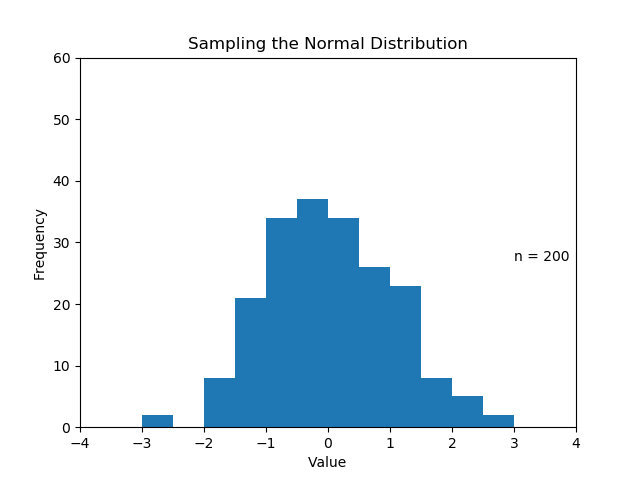

In [55]:
n = 200 # sampling with 200 now

def update(curr):
    
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-5, 10, .5) 
    plt.hist(x1[:curr], bins=bins)
    plt.axis([-4,4,0,60])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])
    
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=10) 

## Final Animation With All Distributions

<IPython.core.display.Javascript object>


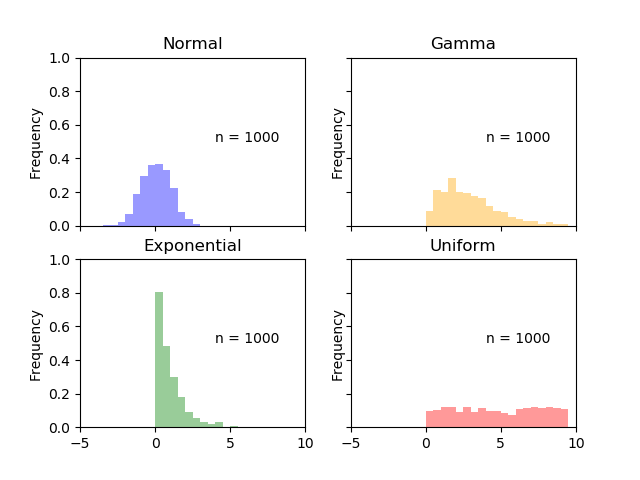

[Text(0.5, 0, 'x axis label')]

In [69]:
import matplotlib.animation as animation

x = [x1, x2, x3, x4]
titles = ['Normal', 'Gamma', 'Exponential', 'Uniform']
color= ['blue','orange','green','red']
n=100
bins = np.arange(-5, 10, .5) # Make sure they all fit   
anno_x = [4, 4, 4, 4]


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey = True, sharex=True)
ax = [ax1, ax2, ax3, ax4]


def update(curr):
    if curr == n:
        a.event_source.stop()
    for i in range(len(ax)):
        ax[i].cla()
        ax[i].hist(x[i][:10*curr], alpha=.4 ,normed = True, bins = bins, color=color[i])
        ax[i].set_title(titles[i])
        ax[i].set_ylabel('Frequency')
        #ax[i].set_xlabel('Value')
        ax[i].annotate('n = {}'.format(10*curr), [anno_x[i], 0.5])
        plt.axis([-5,10,0,1]) # making sure the axis dont change with every refresh so we hardcode the size
        #plt.setp(ax[i], xlabel='x axis label')
    #plt.tight_layout()
a = animation.FuncAnimation(fig, update, interval = 10)
plt.setp(ax[1], xlabel='x axis label')
#plt.setp(axs[:, 0], ylabel='y axis label')

In [56]:
import matplotlib.animation as animation

n = 100

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(0, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000) #gamma(shape, scale=1.0, size=None)
x3 = np.random.exponential(1, 10000) # numpy.random.exponential(scale=1.0, size=None)
x4 = np.random.uniform(0,10, 10000)

In [57]:
def update(curr):
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-5, 10, 1) # Make sure they all fit   
    ax[0,0].hist(x1[:curr], bins=bins, normed=True, alpha=0.2,color='blue')
    plt.annotate('n = {}'.format(curr),[6,.8])
    ax[0, 0].set_title('Normal Distribution')
    plt.cla()
    ax[0,1].hist(x2[:curr], bins=bins, normed=True, alpha=0.2,color='orange')
    ax[0, 1].set_title('Gamma Distribution')
    ax[1,0].hist(x3[:curr], bins=bins, normed=True, alpha=0.2,color='green')
    ax[1, 0].set_title('Exponential Distribution')
    ax[1,1].hist(x4[:curr], bins=bins, normed=True, alpha=0.2,color='red')
    ax[1, 1].set_title('Uniform Distribution')
    plt.axis([-5,10,0,1.1]) # making sure the axis dont change with every refresh so we hardcode the size

<IPython.core.display.Javascript object>


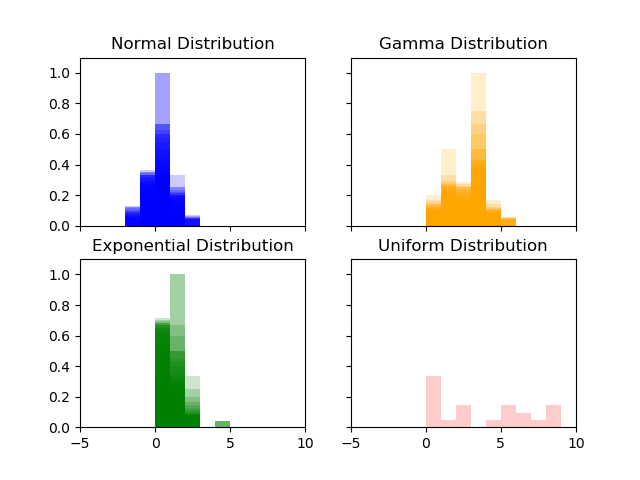

In [58]:
fig_, ax = plt.subplots(2,2, sharex=True,sharey=True) # creating the fig object that is a 2x2 array of axes objects
a = animation.FuncAnimation(fig_, update, interval=10) # constructor function

In [35]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

x1 = np.random.normal(0, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000) 
x3 = np.random.exponential(1, 10000) 
x4 = np.random.uniform(0,10, 10000)


<IPython.core.display.Javascript object>


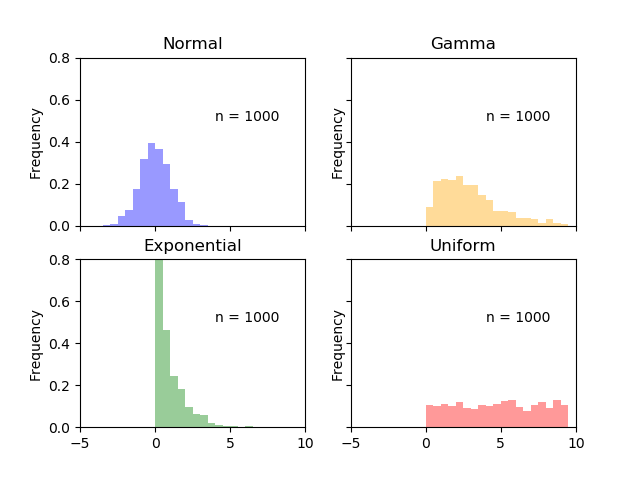

[Text(0.5, 0, 'x axis label')]

In [36]:
import matplotlib.animation as animation

x = [x1, x2, x3, x4]
titles = ['Normal', 'Gamma', 'Exponential', 'Uniform']
color= ['blue','orange','green','red']
n=100
bins = np.arange(-5, 10, .5) # Make sure they all fit   
anno_x = [4, 4, 4, 4]


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey = True, sharex=True)
ax = [ax1, ax2, ax3, ax4]


def update(curr):
    if curr == n:
        a.event_source.stop()
    for i in range(len(ax)):
        ax[i].cla()
        ax[i].hist(x[i][:10*curr], alpha=.4 ,normed = True, bins = bins, color=color[i])
        ax[i].set_title(titles[i])
        ax[i].set_ylabel('Frequency')
        #ax[i].set_xlabel('Value')
        ax[i].annotate('n = {}'.format(10*curr), [anno_x[i], 0.5])
        plt.axis([-5,10,0,.8]) # making sure the axis dont change with every refresh so we hardcode the size
        #plt.setp(ax[i], xlabel='x axis label')
    #plt.tight_layout()
a = animation.FuncAnimation(fig, update, interval = 100)
plt.setp(ax[1], xlabel='x axis label')
#plt.setp(axs[:, 0], ylabel='y axis label')

In [ ]:
# print(x)